# Machine Learning Project Concerning Drug Abuse

Machine learning project by:
Altai Feizi, Lukas Frey, Yann Leymann

## Desired Tastk
- Building a model to predict the probability of drug abuse
- Use the Drug consumption (quantified) dataset containing:
    - Sociodemographic attributes about the participants
    - Information about the specific Drugs they used

![Drugs](graphic/Drugs.png)

## 1. The Big Picture
The objective is to predict a probability for abuse of the given substances. The dataset contains information on 19 drugs, and for each of them, we require a corresponding probability. Thus it would be a Multiclassification Task.

If the model works as planned it could be used to prevent drug abuse by handling people who are at risk at a young age.

In [1]:
import pandas as pd

df = pd.read_csv("data/drug_consumption.data")
df.head()

,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0.4,CL0.5,CL0.6,CL0.7,CL0.8,CL0.9,CL0.10,CL2.2,CL0.11,CL0.12
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [2]:
df.columns = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstacy', 'Heroin', 'Ketamin', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstacy,Heroin,Ketamin,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1884 non-null   int64  
 1   Age        1884 non-null   float64
 2   Gender     1884 non-null   float64
 3   Education  1884 non-null   float64
 4   Country    1884 non-null   float64
 5   Ethnicity  1884 non-null   float64
 6   Nscore     1884 non-null   float64
 7   Escore     1884 non-null   float64
 8   Oscore     1884 non-null   float64
 9   Ascore     1884 non-null   float64
 10  Cscore     1884 non-null   float64
 11  Impulsive  1884 non-null   float64
 12  SS         1884 non-null   float64
 13  Alcohol    1884 non-null   object 
 14  Amphet     1884 non-null   object 
 15  Amyl       1884 non-null   object 
 16  Benzos     1884 non-null   object 
 17  Caff       1884 non-null   object 
 18  Cannabis   1884 non-null   object 
 19  Choc       1884 non-null   object 
 20  Coke    

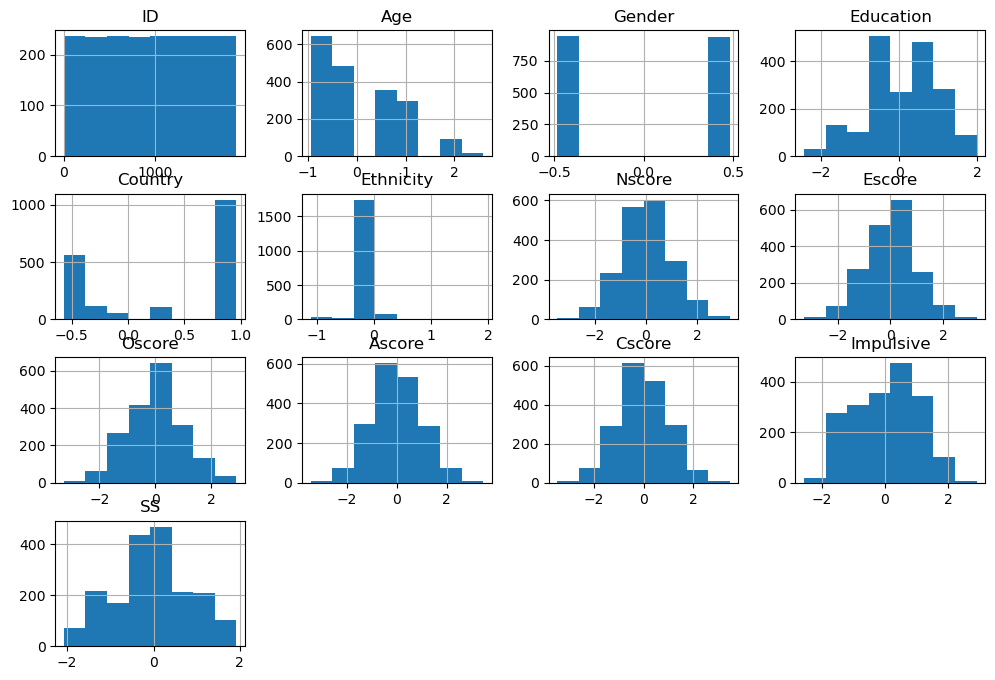

In [4]:
import matplotlib.pyplot as plt

df.hist(bins=8, figsize=(12, 8))
plt.show()

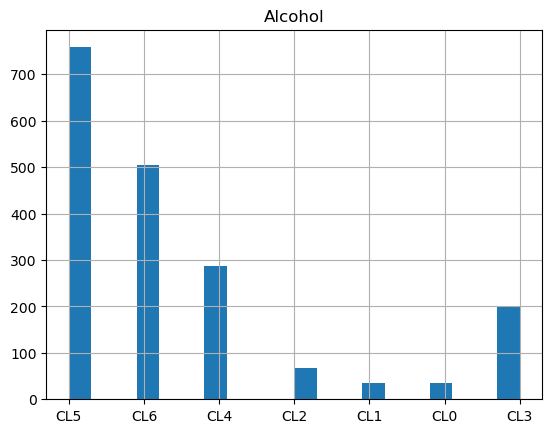

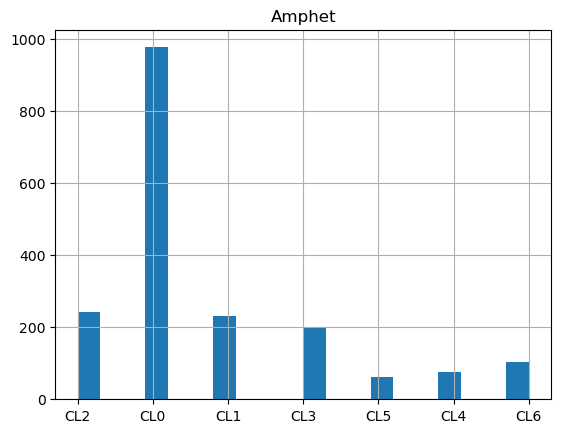

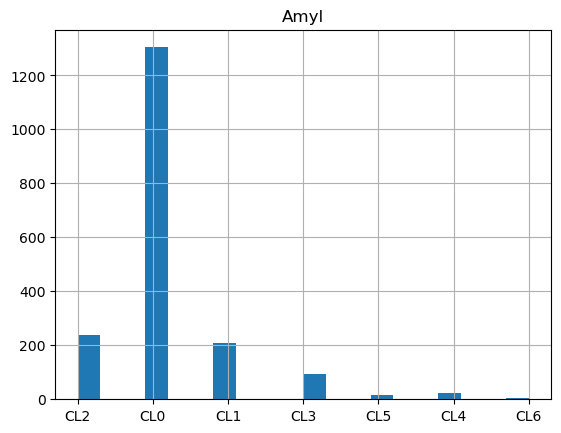

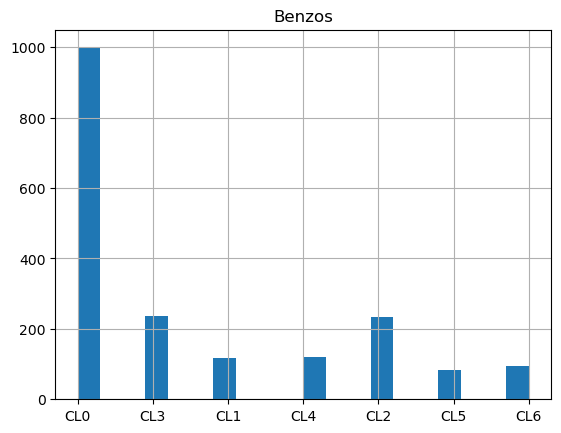

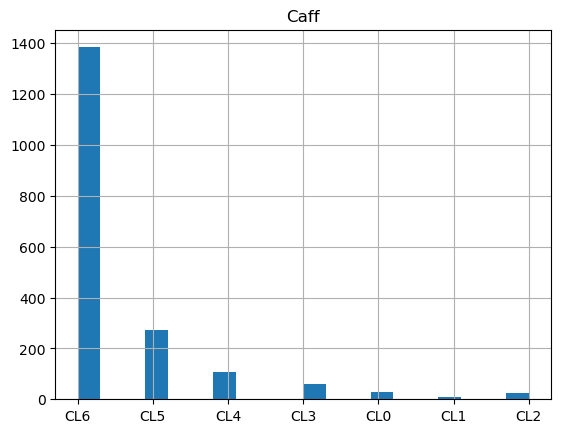

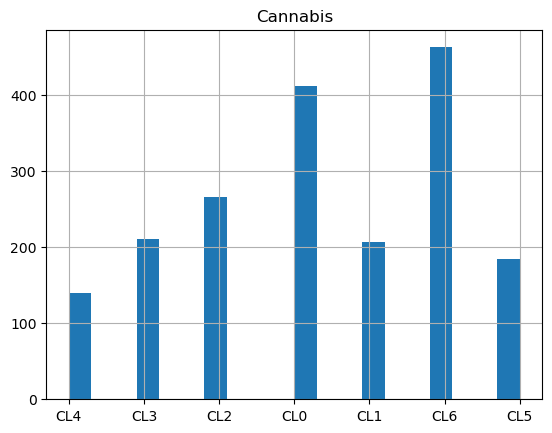

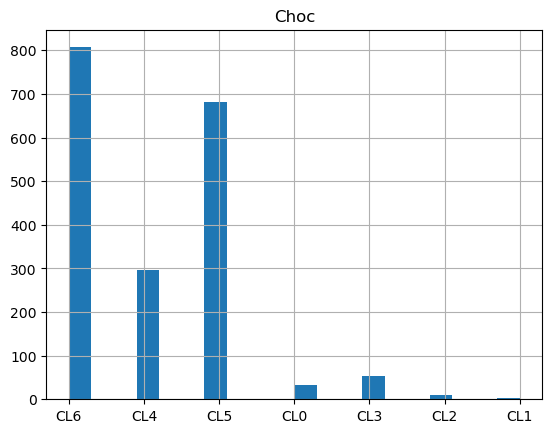

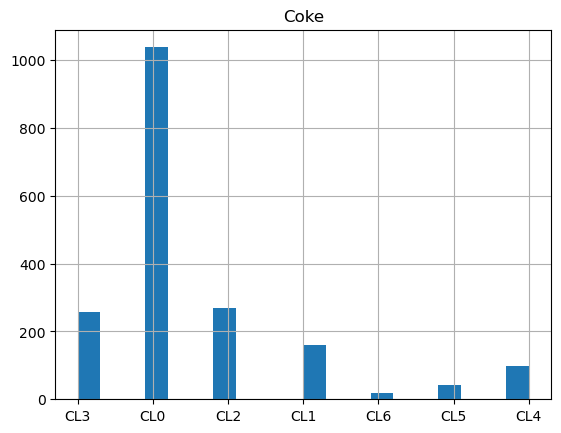

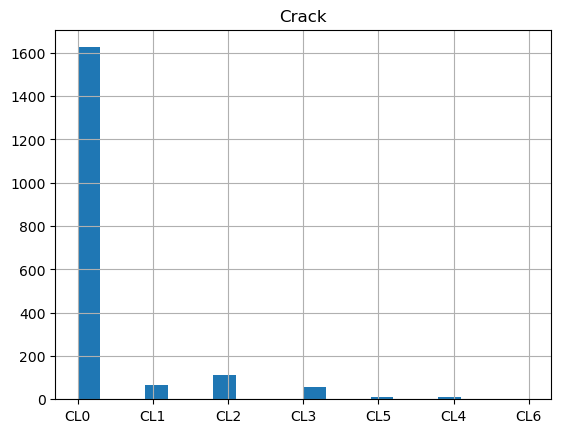

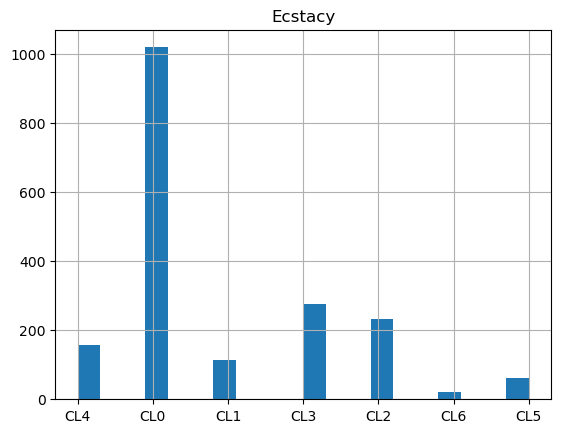

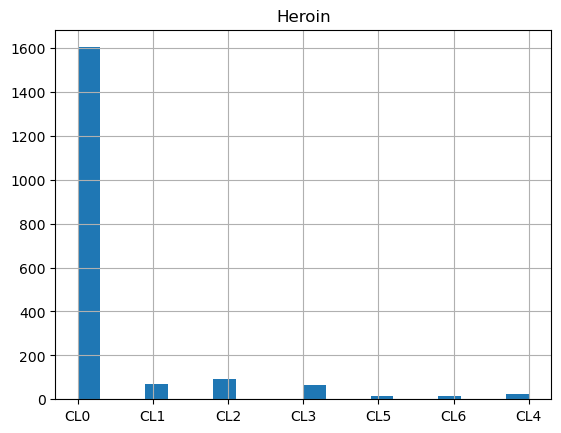

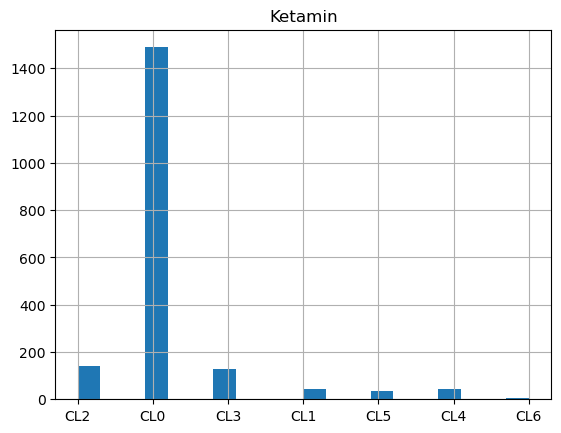

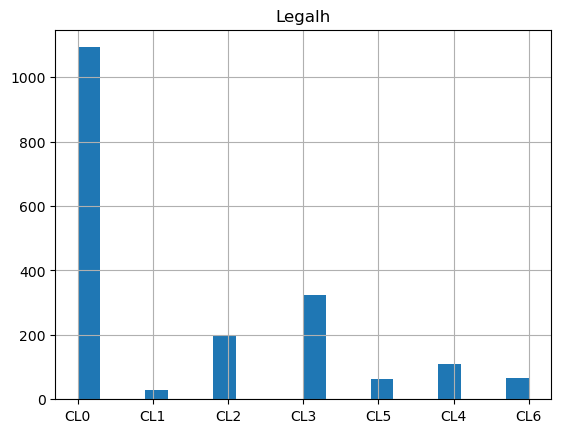

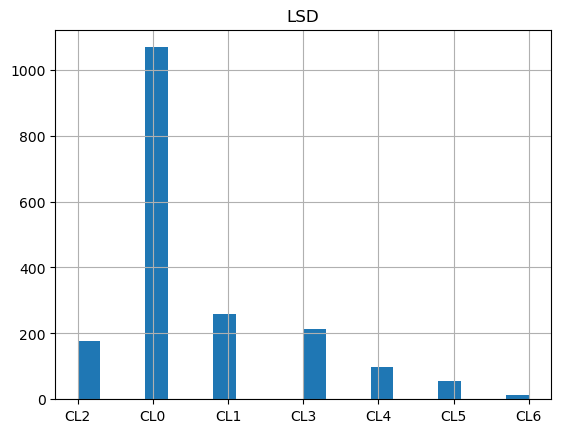

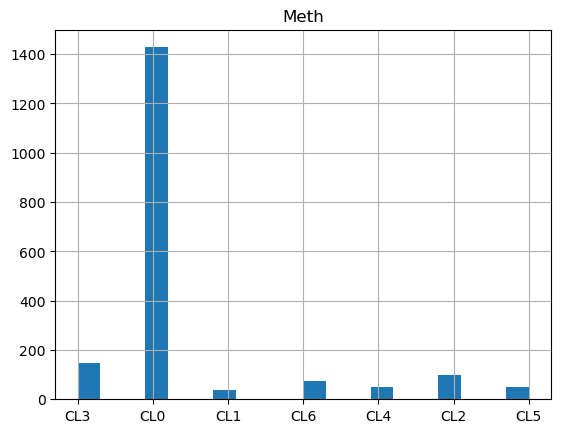

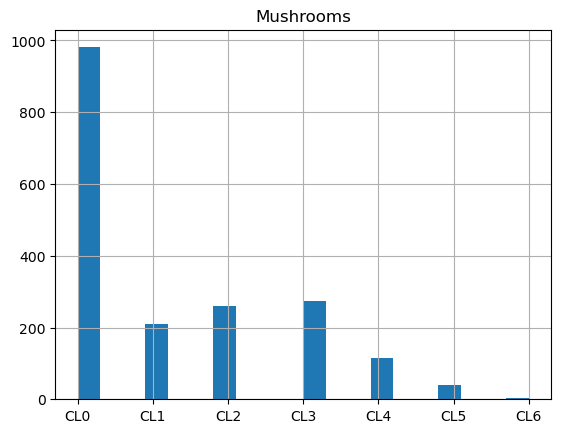

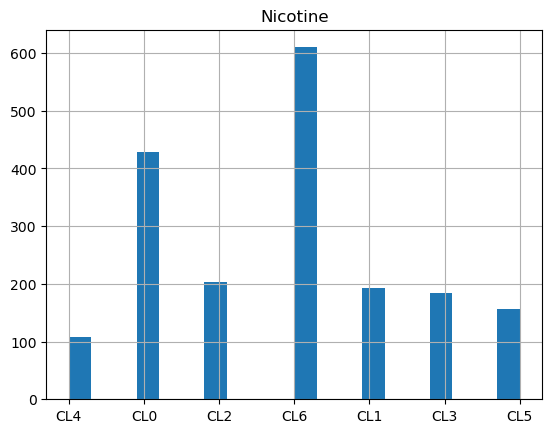

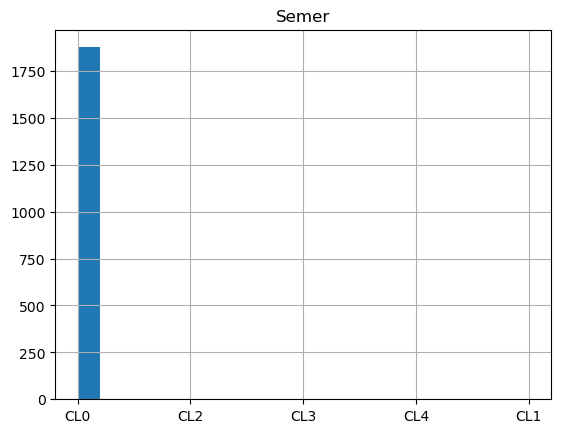

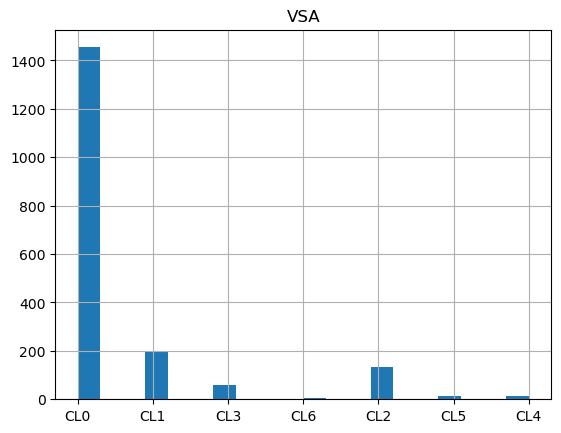

In [5]:
obj_cols = df.select_dtypes(include=['object'])

for col in obj_cols:
    fig, ax = plt.subplots()
    df[col].hist(bins=20)
    ax.set_title(col)
    plt.show()

In [6]:
df1 = df.iloc[:,:13]
df2 = df.iloc[:, 13:]

attributes_to_update = df2.columns

for attribute in attributes_to_update:
    df.loc[df[attribute] == "CL0", attribute] = 0
    df.loc[df[attribute].isin(["CL1", "CL2", "CL3", "CL4", "CL5", "CL6"]), attribute] = 1


df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstacy,Heroin,Ketamin,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,1,0,1,0,1,1,0,1,0,0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,1,0,0,0,0,1,0,0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,1,1,0,0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,0,0,0,0,0,0,0,1,0,0


In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
corr_matrix = df1.corr()
#for i in df1.columns:
#    print(corr_matrix[i].sort_values(ascending=False),'\n')

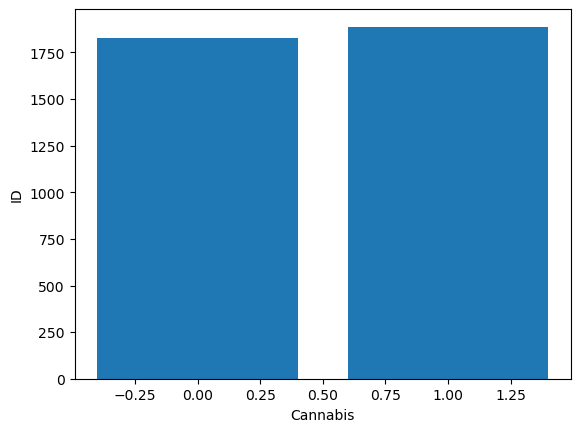

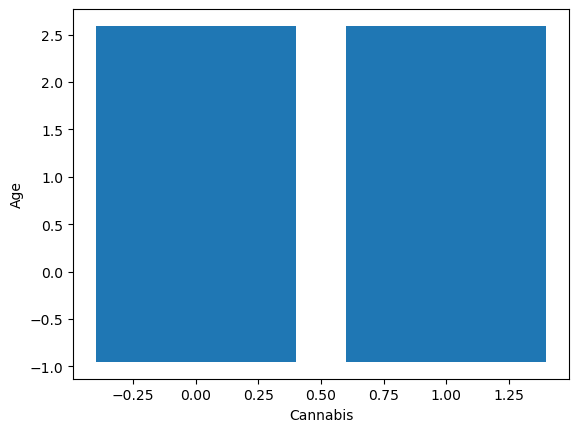

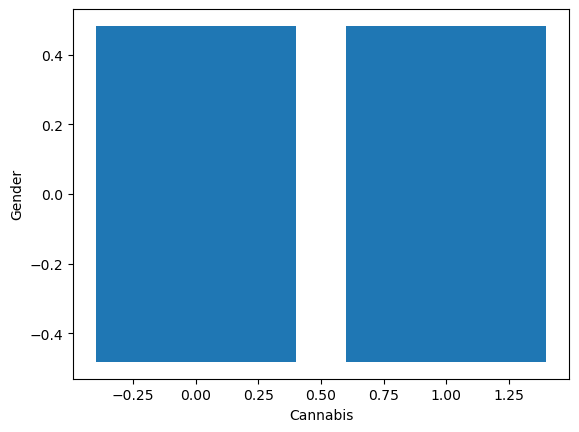

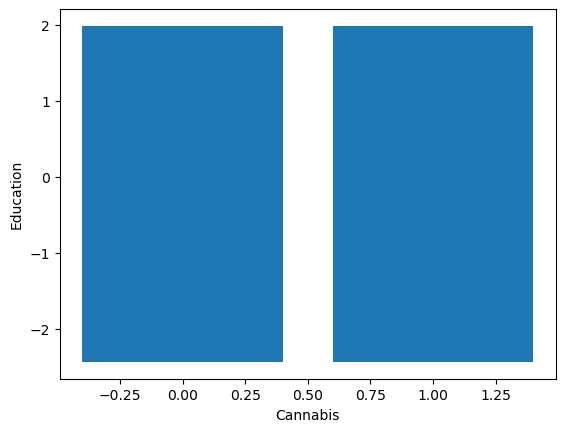

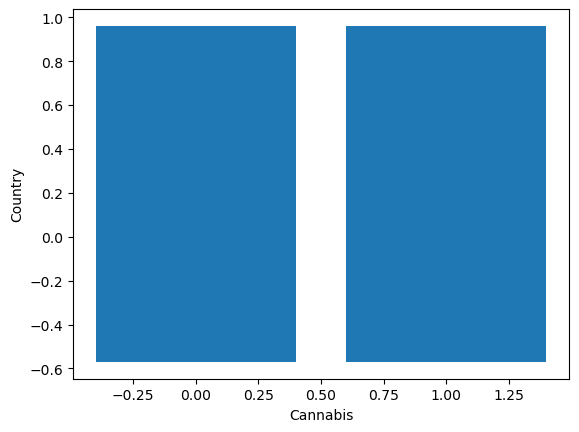

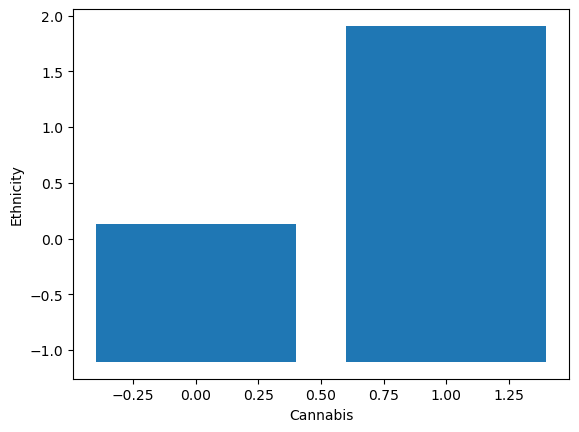

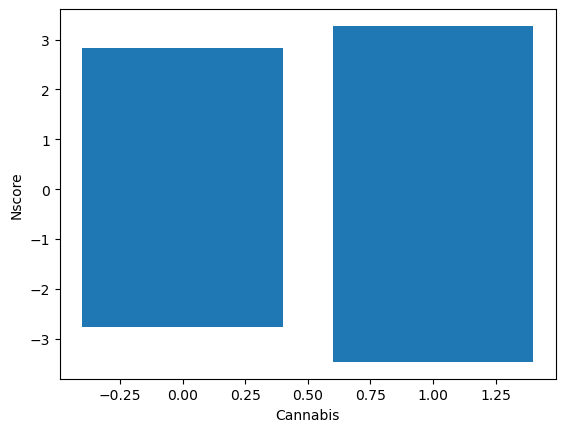

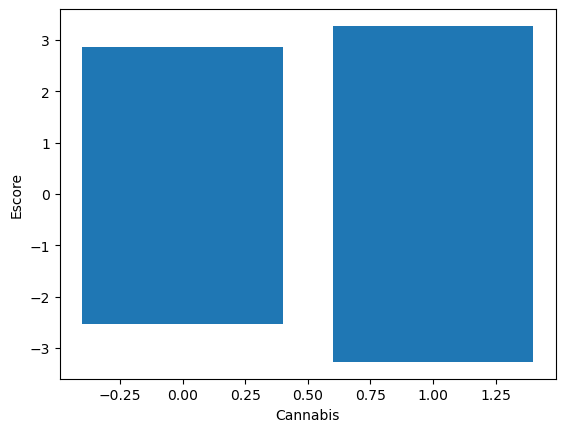

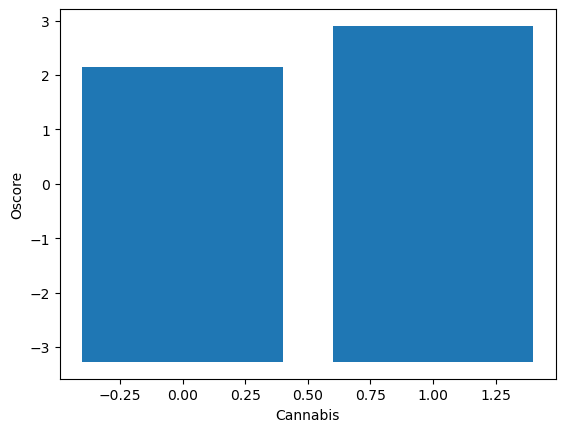

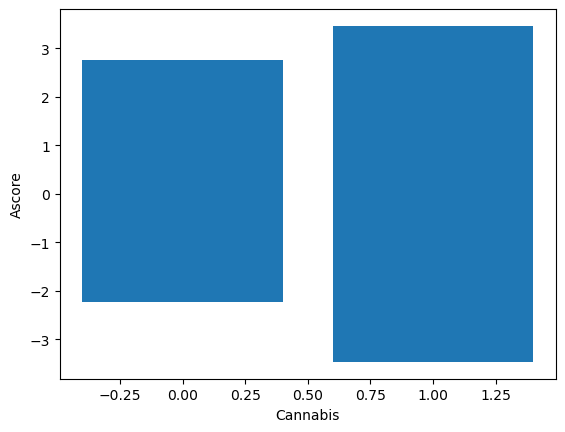

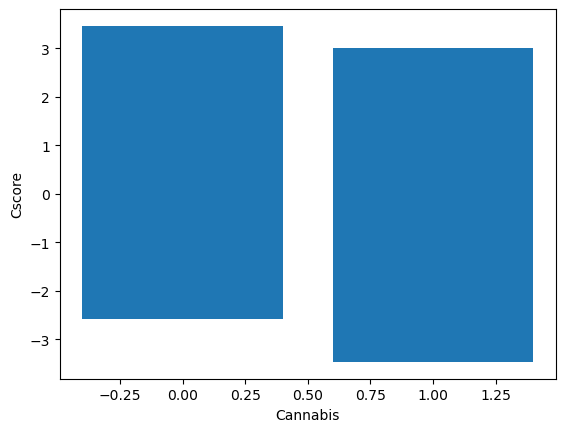

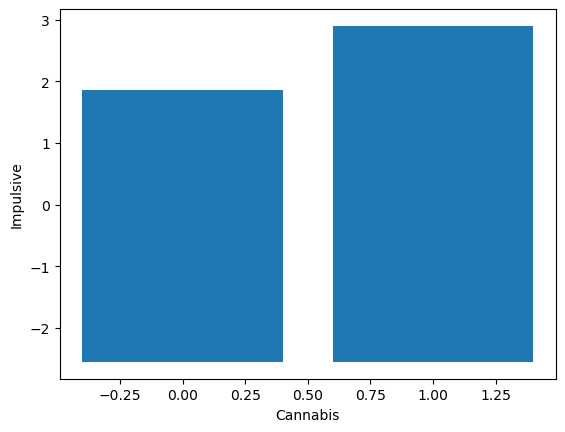

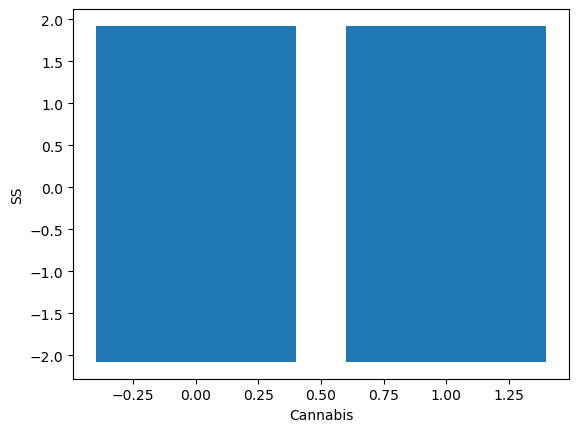

In [9]:
from pandas.plotting import scatter_matrix

attributes = df1.columns
attribute_to_plot = 'Cannabis'
for attribute in attributes:
    if attribute != attribute_to_plot:
        plt.bar(df[attribute_to_plot], df[attribute])
        plt.xlabel(attribute_to_plot)
        plt.ylabel(attribute)
        plt.show()